In [45]:
# %matplotlib widget

from __future__ import annotations

import re
from collections import defaultdict
from dataclasses import dataclass, field
from itertools import product
from math import inf
from random import choice

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import numpy.typing as npt
from mpl_toolkits.mplot3d import axes3d
from numpy import int_, object_
from numpy.typing import NDArray
from test_utilities import run_tests_params
from util import print_hex

COLORS = list(mcolors.CSS4_COLORS.keys())

<link href="style.css" rel="stylesheet"></link>
<article class="day-desc"><h2>--- Day 9: All in a Single Night ---</h2><p>Every year, Santa manages to deliver all of his presents in a single night.</p>
<p>This year, however, he has some <span title="Bonus points if you recognize all of the locations.">new locations</span> to visit; his elves have provided him the distances between every pair of locations.  He can start and end at any two (different) locations he wants, but he must visit each location exactly once.  What is the <em>shortest distance</em> he can travel to achieve this?</p>
<p>For example, given the following distances:</p>
<pre><code>London to Dublin = 464
London to Belfast = 518
Dublin to Belfast = 141
</code></pre>
<p>The possible routes are therefore:</p>
<pre><code>Dublin -&gt; London -&gt; Belfast = 982
London -&gt; Dublin -&gt; Belfast = 605
London -&gt; Belfast -&gt; Dublin = 659
Dublin -&gt; Belfast -&gt; London = 659
Belfast -&gt; Dublin -&gt; London = 605
Belfast -&gt; London -&gt; Dublin = 982
</code></pre>
<p>The shortest of these is <code>London -&gt; Dublin -&gt; Belfast = 605</code>, and so the answer is <code>605</code> in this example.</p>
<p>What is the distance of the shortest route?</p>
</article>


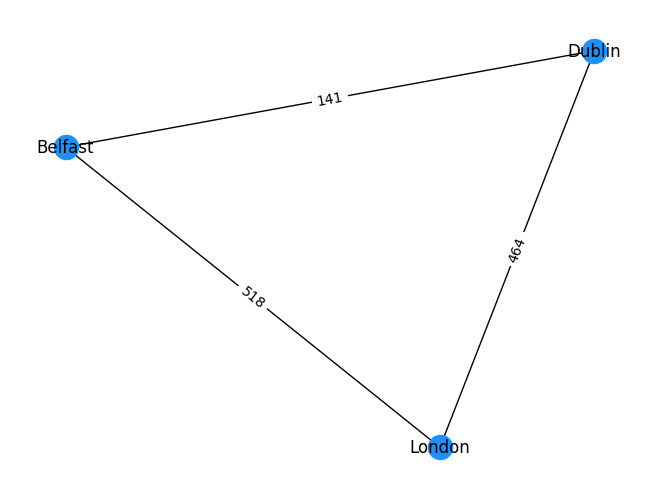

In [56]:
from functools import cache


s = """
London to Dublin = 464
London to Belfast = 518
Dublin to Belfast = 141
"""


class Graph:
    def __init__(self, s: str) -> None:
        self.graph = self.parse_and_create_graph(s)

    def parse_and_create_graph(self, s):
        graph = defaultdict(lambda: defaultdict(int))
        for l in s.strip().splitlines():
            key, dist = re.split(r"\s*=\s*", l)
            fr, to = re.split(r"\s*to\s*", key)
            dist = int(dist)
            graph[fr][to] = dist
            graph[to][fr] = dist
        return graph

    def shortest_hamiltonian_path_bf(self):
        @cache
        def dfs(vertex, length, rest_vertici):
            if not rest_vertici:
                return length
            return min(
                dfs(v, length + self.graph[vertex][v], rest_vertici - {v})
                for v in self.graph[vertex]
                if v in rest_vertici
            )

        vertici = frozenset(self.graph.keys())
        return min(dfs(v, 0, vertici - {v}) for v in vertici)

    def longest_hamiltonian_path_bf(self):
        @cache
        def dfs(vertex, length, rest_vertici):
            if not rest_vertici:
                return length
            return max(
                (
                    dfs(v, length + self.graph[vertex][v], rest_vertici - {v})
                    for v in self.graph[vertex]
                    if v in rest_vertici
                ),
                default=0,
            )

        vertici = frozenset(self.graph.keys())
        return max(dfs(v, 0, vertici - {v}) for v in vertici)

    def plot(self) -> None:
        plt.close()

        G = nx.Graph()  # create an empty object

        G.add_nodes_from(self.graph.keys())
        G.add_edges_from(
            [(fr, to) for fr, tos in self.graph.items() for to in tos.keys()]
        )
        edge_labels = {
            (fr, to): d for fr, tos in self.graph.items() for to, d in tos.items()
        }
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color="DodgerBlue")
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        plt.show()


g = Graph(s)
assert g.shortest_hamiltonian_path_bf() == 605
g.plot()

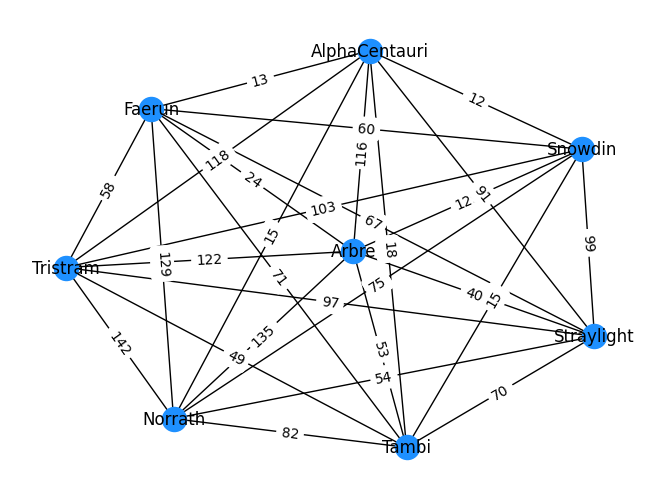

207

In [57]:
with open("../input/day9.txt") as f:
    file_str = f.read()

gf = Graph(file_str)
gf.plot()
gf.shortest_hamiltonian_path_bf()

<link href="style.css" rel="stylesheet"></link>

<main>

<p>Your puzzle answer was <code>207</code>.</p><p class="day-success">The first half of this puzzle is complete! It provides one gold star: *</p>
<article class="day-desc"><h2 id="part2">--- Part Two ---</h2><p>The next year, just to show off, Santa decides to take the route with the <em>longest distance</em> instead.</p>
<p>He can still start and end at any two (different) locations he wants, and he still must visit each location exactly once.</p>
<p>For example, given the distances above, the longest route would be <code>982</code> via (for example) <code>Dublin -&gt; London -&gt; Belfast</code>.</p>
<p>What is the distance of the longest route?</p>
</article>

</main>


In [59]:
assert g.longest_hamiltonian_path_bf() == 982

In [60]:
gf.longest_hamiltonian_path_bf()

804

<link href="style.css" rel="stylesheet"></link>
<main>

<p>Your puzzle answer was <code>804</code>.</p><p class="day-success">Both parts of this puzzle are complete! They provide two gold stars: **</p>
<p>At this point, you should <a href="/2015">return to your Advent calendar</a> and try another puzzle.</p>
<p>If you still want to see it, you can <a href="9/input" target="_blank">get your puzzle input</a>.</p>
<p>You can also <span class="share">[Share<span class="share-content">on
  <a href="https://twitter.com/intent/tweet?text=I%27ve+completed+%22All+in+a+Single+Night%22+%2D+Day+9+%2D+Advent+of+Code+2015&amp;url=https%3A%2F%2Fadventofcode%2Ecom%2F2015%2Fday%2F9&amp;related=ericwastl&amp;hashtags=AdventOfCode" target="_blank">Twitter</a>
  <a href="javascript:void(0);" onclick="var ms; try{ms=localStorage.getItem('mastodon.server')}finally{} if(typeof ms!=='string')ms=''; ms=prompt('Mastodon Server?',ms); if(typeof ms==='string' &amp;&amp; ms.length){this.href='https://'+ms+'/share?text=I%27ve+completed+%22All+in+a+Single+Night%22+%2D+Day+9+%2D+Advent+of+Code+2015+%23AdventOfCode+https%3A%2F%2Fadventofcode%2Ecom%2F2015%2Fday%2F9';try{localStorage.setItem('mastodon.server',ms);}finally{}}else{return false;}" target="_blank">Mastodon</a></span>]</span> this puzzle.</p>
</main>
